## Training results
- Machine Learning; predicting cost: MAE 5.2
- Machine Learning; predicting total_secs + num_unq: MAE 5.2

- Deep Learning; predicting cost: MAE 5.1
- Deep Learning; predicting total_secs + num_unq: MAE ?

In [6]:
%load_ext autoreload
%autoreload 2

In [1]:
from Utils.DataLoader import DataLoader
from Utils.DataTransformer import DataTransformer
from Utils.DuckDb import DuckDb
from datetime import datetime
import pandas as pd
from typing import List
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from Utils import PandasNotebookConfigs

In [2]:
PandasNotebookConfigs.config()

Ajustando display.float.format para %.2f


In [3]:
DUCK_DB_UTILS = DuckDb()
DATA_TRANSFORMER = DataTransformer()

In [4]:
TABLE_NAME = 'treated_churn_dataset_2025_03_11_08h03m'

In [5]:
df = DUCK_DB_UTILS.load_table(TABLE_NAME)

In [7]:
len(df)

92647

In [8]:
# Treating DF
df.isna().sum().T

cost                                  0
msno                                  0
safra                                 0
num_25                                0
num_50                                0
num_75                                0
num_985                               0
num_100                               0
num_unq                               0
total_secs                            0
total_hours                           0
msno_1                                0
payment_method_id                     0
payment_plan_days                     0
plan_list_price                       0
actual_amount_paid                    0
is_auto_renew                         0
is_cancel                             0
safra_1                               0
transaction_date_year                 0
transaction_date_month                0
transaction_date_day                  0
transaction_date_day_of_week          0
transaction_date_day_of_year          0
membership_expire_date_year           0


In [14]:
df = df[df['should_delete_row'] == False]
df = df.drop('should_delete_row', axis=1)

In [17]:
df.head()

,cost,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,safra_2,city,registered_via,is_active,registration_init_time_year,registration_init_time_month,registration_init_time_day,registration_init_time_day_of_week,registration_init_time_day_of_year,is_churn
4,64.67,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201607,72,17,17,17,459,513,120546,...,201607,15,9,True,2010,11,18,3,322,False
5,72.33,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201608,77,27,35,29,709,747,185178,...,201608,15,9,True,2010,11,18,3,322,False
6,70.95,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201609,53,28,18,19,665,707,173410,...,201609,15,9,True,2010,11,18,3,322,False
10,76.04,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201601,113,48,33,45,774,845,217292,...,201601,1,7,True,2014,9,27,5,270,False
11,70.49,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201602,284,89,53,55,534,840,162097,...,201602,1,7,True,2014,9,27,5,270,False


In [18]:
# Feature engineering
df['safra_year'] = df['safra'].astype(str).str[:4].astype(float)
df['safra_month'] = df['safra'].astype(str).str[-2:].astype(float)

In [19]:
df.head()

,cost,msno,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,...,registered_via,is_active,registration_init_time_year,registration_init_time_month,registration_init_time_day,registration_init_time_day_of_week,registration_init_time_day_of_year,is_churn,safra_year,safra_month
4,64.67,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201607,72,17,17,17,459,513,120546,...,9,True,2010,11,18,3,322,False,2016.00,7.00
5,72.33,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201608,77,27,35,29,709,747,185178,...,9,True,2010,11,18,3,322,False,2016.00,8.00
6,70.95,+++l/EXNMLTijfLBa8p2TUVVVp2aFGSuUI/h7mLmthw=,201609,53,28,18,19,665,707,173410,...,9,True,2010,11,18,3,322,False,2016.00,9.00
10,76.04,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201601,113,48,33,45,774,845,217292,...,7,True,2014,9,27,5,270,False,2016.00,1.00
11,70.49,+++snpr7pmobhLKUgSHTv/mpkqgBT0tQJ0zQj6qKrqc=,201602,284,89,53,55,534,840,162097,...,7,True,2014,9,27,5,270,False,2016.00,2.00


In [12]:
    # # Selecting features after Lasso
    # lasso_selected_features = [
    #     # X features
    #     'cost', 'safra', 'num_25', 'num_50', 'num_75', 'num_985', 'num_100',
    #     'num_unq', 'total_secs', 'payment_method_id', 'payment_plan_days', 'plan_list_price',
    #     'is_auto_renew', 'transaction_date_month', 'transaction_date_day', 'transaction_date_day_of_week',
    #     'transaction_date_day_of_year', 'membership_expire_date_month', 'membership_expire_date_day',
    #     'membership_expire_date_day_of_week', 'membership_expire_date_day_of_year', 'discount', 'price_per_month',
    #     'city', 'registered_via', 'registration_init_time_year', 'registration_init_time_month',
    #     'registration_init_time_day', 'registration_init_time_day_of_week', 'registration_init_time_day_of_year',
    #     'cost-2M', 'cost-1M', 'num_unq-2M', 'num_unq-1M', 'total_secs-2M', 'total_secs-1M',

    #     # y targets
    #     'total_secs+1M', 'num_unq+1M', 'cost+1M'
    # ]

    # df = df[lasso_selected_features]

In [20]:
df.isna().sum().T

cost                                  0
msno                                  0
safra                                 0
num_25                                0
num_50                                0
num_75                                0
num_985                               0
num_100                               0
num_unq                               0
total_secs                            0
total_hours                           0
msno_1                                0
payment_method_id                     0
payment_plan_days                     0
plan_list_price                       0
actual_amount_paid                    0
is_auto_renew                         0
is_cancel                             0
safra_1                               0
transaction_date_year                 0
transaction_date_month                0
transaction_date_day                  0
transaction_date_day_of_week          0
transaction_date_day_of_year          0
membership_expire_date_year           0


In [21]:
# Dropping duplicated columns or useless columns
drop_columns = ['msno', 'safra_1', 'safra_2', 'msno_1', 'msno_2']
for col in drop_columns:
    if col not in df.columns:
        print(f'Coluna {col} não existente no DataFrame')
    else:
        print(f'Dropando coluna {col}')
        df = df.drop(col, axis=1,)

Dropando coluna msno
Dropando coluna safra_1
Dropando coluna safra_2
Dropando coluna msno_1
Dropando coluna msno_2


In [22]:
df.head().T

,4,5,6,10,11
cost,64.67,72.33,70.95,76.04,70.49
safra,201607,201608,201609,201601,201602
num_25,72,77,53,113,284
num_50,17,27,28,48,89
num_75,17,35,18,33,53
num_985,17,29,19,45,55
num_100,459,709,665,774,534
num_unq,513,747,707,845,840
total_secs,120546,185178,173410,217292,162097
total_hours,33.48,51.44,48.17,60.36,45.03


In [23]:
# Turning columns into categories
cat_columns = [
    'payment_method_id',
    'city',
    'registered_via',
]

df = DATA_TRANSFORMER.convert_to_category(
    df,
    cat_columns
)

df = pd.get_dummies(df, columns=cat_columns)

In [24]:
df.dtypes

cost                 float64
safra                  int64
num_25                 int64
num_50                 int64
num_75                 int64
                      ...   
registered_via_13       bool
registered_via_3        bool
registered_via_4        bool
registered_via_7        bool
registered_via_9        bool
Length: 85, dtype: object

In [25]:
target_cols = 'is_churn'

X = df.drop(target_cols, axis=1)
y = df[target_cols]

# target_cols = ['total_secs+1M', 'num_unq+1M']
# X = df.drop(target_cols, axis=1)
# y = df[target_cols]

In [27]:
def get_future_data_columns(df: pd.DataFrame) -> List[str]:
    result = []
    for col in df.columns:
        if '+1M' in col:
            result.append(col)

    return result

In [28]:
# Removing all future data (M+1) from the data set
def remove_future_data_columns(df: pd.DataFrame) -> pd.DataFrame:
    to_remove = get_future_data_columns(df)
    df.drop(to_remove, axis=1, inplace=True)
    return df

In [29]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=7)
# X = pca.fit_transform(X)

In [31]:
len(X), len(y)

(51107, 51107)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# X_train_cost = X_train['cost+1M']
# X_train = X_train.drop('cost+1M', axis=1)

# X_test_cost = X_test['cost+1M']
# X_test = X_test.drop('cost+1M', axis=1)

In [35]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40885, 10222, 40885, 10222)

In [ ]:
# model = RandomForestRegressor(
#     n_jobs=-1,
#     random_state=42,
# )

# model.fit(X_train, y_train)

In [ ]:
# Create evaluation function (the competition uses RMLSE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score, mean_squared_error
import numpy as np


def rmsle(y_test, y_preds):
    '''
    Calculates root mean squared error between predictions and true labels
    '''
    return str(np.sqrt(mean_squared_log_error(y_test, y_preds)))


def show_scores(model, X_train, X_test, y_train, y_test):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_test)

    # When val_preds score is bigger, it means that your model has overfitting problems
    scores = {
        'Training MAE': mean_absolute_error(y_train, train_preds),
        'Valid MAE': mean_absolute_error(y_test, val_preds),

        # 'Training RMSLE': rmsle(y_train, train_preds),
        # 'Valid RMSLE': rmsle(y_test, val_preds),

        'Training R^2': r2_score(y_train, train_preds),
        'Valid R^2': r2_score(y_test, val_preds),
    }

    return scores


def show_scores_2(y_true, y_preds):
    # When val_preds score is bigger, it means that your model has overfitting problems
    scores = {
        'MAE': mean_absolute_error(y_true, y_preds),
        'MSE': mean_squared_error(y_true, y_preds),
        'R^2': r2_score(y_true, y_preds),
    }

    return scores

In [ ]:
X_train.head().T

In [ ]:
X.head()

In [ ]:
X_test.head()

In [38]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, RocCurveDisplay
import numpy as np

# Put models on a dictionary
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    '''
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learning machine learning models
    X_train: training data, no labels
    X_test: testing data, no labels 
    y_train: training labels
    y_test: test labels
    '''
    np.random.seed(42)

    models_scores = {}
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)

        # Evaluate the model and append its score to model_scores
        models_scores[name] = model.score(X_test, y_test)

    return models_scores

In [39]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

/home/caio/Git-Projetos/2025-case-data-master-caio-arrabal/env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
X_train

,cost,safra,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs,total_hours,...,city_5,city_6,city_7,city_8,city_9,registered_via_13,registered_via_3,registered_via_4,registered_via_7,registered_via_9
24218,54.58,201608,69,28,15,13,108,214,34863,9.68,...,False,False,False,False,False,False,False,False,True,False
16781,50.71,201603,5,2,2,0,20,25,5837,1.62,...,False,False,False,False,False,False,False,False,False,True
78512,55.86,201608,33,11,9,17,175,193,48755,13.54,...,False,False,False,True,False,False,True,False,False,False
24920,55.41,201609,79,9,14,12,141,229,42410,11.78,...,True,False,False,False,False,False,False,False,False,True
84180,60.07,201603,45,11,8,6,310,332,83810,23.28,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20521,69.99,201609,43,6,8,5,647,618,168430,46.79,...,False,False,False,False,True,False,False,False,False,True
80939,50.15,201608,0,1,0,0,4,5,1287,0.36,...,False,False,False,False,False,False,False,False,True,False
69297,102.48,201608,241,75,61,99,1557,1763,434842,120.79,...,False,False,False,False,False,False,False,False,False,True
1576,52.03,201609,43,13,5,4,58,113,14490,4.03,...,False,False,False,False,False,False,False,False,True,False


In [45]:
y_train

24218     True
16781    False
78512     True
24920    False
84180    False
         ...  
20521    False
80939    False
69297     True
1576     False
28766    False
Name: is_churn, Length: 40885, dtype: bool

In [40]:
model_scores

{'Logistic Regression': 0.9428683232244179,
 'KNN': 0.9416943846605361,
 'Random Forest': 0.9505967521033066}

<Axes: >

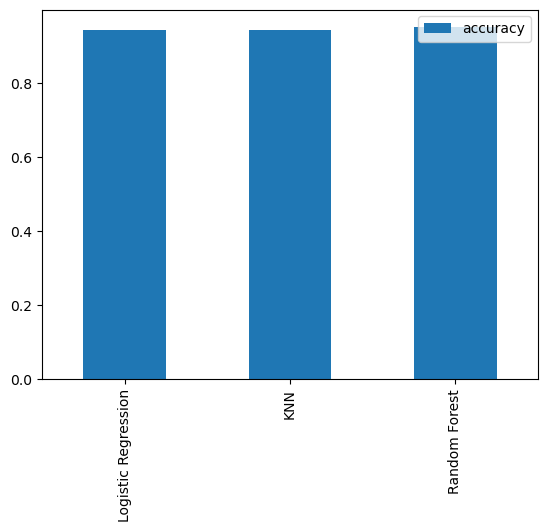

In [41]:
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar()

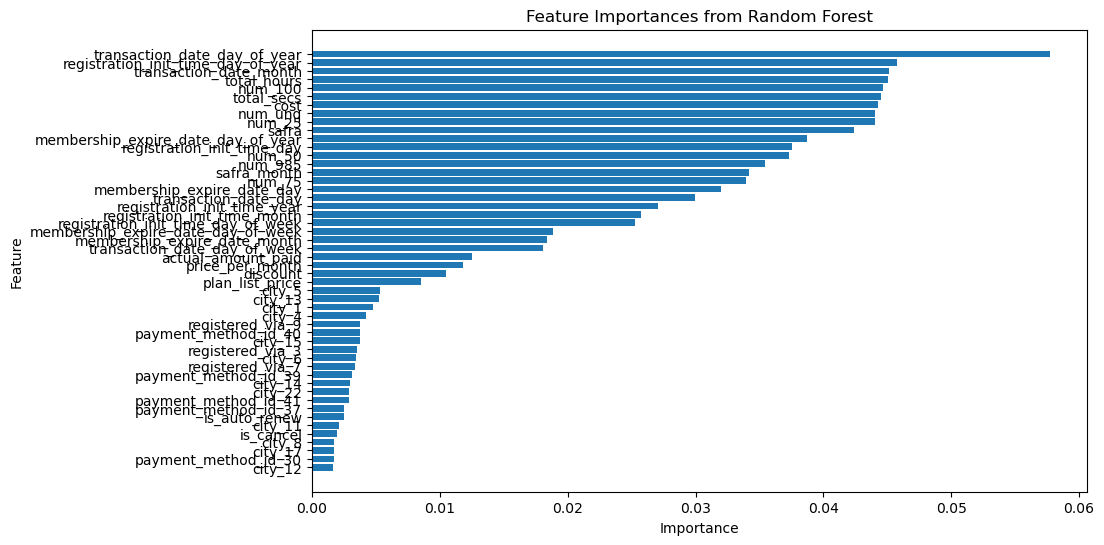

In [76]:
import matplotlib.pyplot as plt

# Feature importance
choosen_model = models['Random Forest']

# Get feature importances
importances = choosen_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

feature_importances = feature_importances[:50]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest importance at the top
plt.show()